### Problem Statement
Note: Please go through the inventory management problem (MDP and the Q-learning code) carefully to solve the assignment.

 
One of the most popular and enduring games of all time is Tic-Tac-Toe. Because of its familiarity, this game is often used as a starting example to mathematically analyze a decision-making process. Its brevity makes it a perfect game to illustrate the rewards of thinking ahead and learning the consequence of each decision.

 
There are many variants of Tic-Tac-Toe. The most classic one is of X’s and O’s, where each player aims to place three of their marks in a horizontal, vertical, or diagonal row in a 3x3 grid.

 
The other popular variant of this game is Numerical Tic-Tac-Toe. Instead of X’s and O’s, the numbers 1 to 9 are used. In the 3x3 grid, numbers 1 to 9 are filled, with one number in each cell. The first player plays with the odd numbers, the second player plays with the even numbers, i.e. player 1 can enter only an odd number in the cell while player 2 can enter an even number in one of the remaining cells. Each number can be used exactly once in the entire grid. The player who puts down 15 points in a line - (column, row or a diagonal) wins the game. 

 
It is recommended that you play the game here for more clarity.

 
Rules of the Game:
The game will be played on a 3x3 grid (9 cells) using numbers from 1 to 9. Each number can be used exactly once in the entire grid.

There are two players: one is the Reinforcement Learning (RL) agent and other is the environment.

The RL agent is given odd numbers {1, 3, 5, 7, 9} and the environment is given the even numbers {2, 4, 6, 8}

Each of them takes a turn. The player with odd numbers always goes first.

At each round, a player puts one unused number on a blank spot.

The objective is to make 15 points in a row, column or a diagonal. The player can use the opponent's numbers in the grid to make 15.

The game terminates when any one of the players makes 15.

In this assignment, you need to build an RL agent that learns to play Numerical Tic-Tac-Toe with odd numbers (the agent will always make the first move). You need to train your agent using Q-Learning. The environment is playing randomly with the agent, i.e. its strategy is to put an even number randomly in an empty cell. If your agent wins the game, it gets 10 points, if the environment wins, the agent loses 10 points. And if the game ends in a draw, it gets 0. Also, you want the agent to win in as few moves as possible, so for each move, it gets a -1 point.

Following is a sample episode for your reference:

In this episode, the environment wins as it is able to make 15 first (8+6+1).  After the agent places 1 in one of the grids, the environment rewards it (with a negative reward of -1) and makes a next move of placing 8 in one of the remaining cells.

Goals
You are given two files: ‘TCGame_Env.py’ and ‘TicTacToe_Agent.ipynb’. The first one is the environment file and the second one is the agent file. You use the environment that is created in TCGame_Env.py to write the learning algorithm.

You need to accomplish following in this assignment:

Create an MDP for Numerical Tic-Tac-Toe game. The basic framework for this is:

Initialise the state

Define the action space for each state. (Be careful in defining actions. The actions are not the same for each state)

Define the winning states: the sum of three numbers in a row, column or diagonal is 15.

Define the terminal states (win,tie,loss)

Build the reward structure as below:

+10 if the agent wins (makes 15 points first)

-10 if the environment wins

0 if the game ends in a draw (no one is able to make 15 and the board is filled up)

-1 for each move agent takes

Define a step function which takes in an input of the agent’s action and state; and outputs the next state and reward. (Make sure you incorporate environment’s move in the next state).

For your reference: TCGame_Env.py file is provided with a basic structure of the code. The functions (and the comments) will provide an intuition of how the MDP would be formulated. Codes of a few functions are also provided to give you more sense on how to proceed with the MDP. Note: Using this framework is not compulsory, you can create your own framework and functions as well.

Build an agent that learns the game by Q-Learning. You can choose the hyperparameters (epsilon (decay rate), learning-rate, discount factor) of your choice. For that, you can train the model iteratively to obtain a good combination of hyperparameters. You won’t be evaluated on your choice of the hyperparameters. You need to submit only the final model. 

While updating the Q-values, if the next state is a terminal state, then the Q-values from that state are 0. (No action is possible from that state)

For a 64-bit system with 8GB RAM, it takes ~30 minutes to run 5Mn episodes.

Q-values convergence- check whether Q-values learnt by the agent have converged or not. Sample 4 state-action pairs and plot it with the number of episodes to understand the convergence.

You can download the files from below:

TCGame_Envfile_download	Download
TicTacToe_Agentfile_download	Download
Submission:
You need to submit one zip file containing the following three files for evaluation:

the environment file: ‘TCGame_Env.py’

the agent’s learning file: ‘TicTacToe_Agent.ipynb’

Q-values of the state-action pairs tracked

Importing relevent libraries

In [30]:
from TCGame_Env import TicTacToe
import collections
import numpy as np
import random
import pickle
import collections
from matplotlib import pyplot as plt
import time

In [14]:
# Function to convert state array into a string to store it as keys in the dictionary
# states in Q-dictionary will be of form: x-4-5-3-8-x-x-x-x
#   x | 4 | 5
#   ----------
#   3 | 8 | x
#   ----------
#   x | x | x

def Q_state(state):

    return ('-'.join(str(e) for e in state)).replace('nan','x')

In [15]:
# Defining a function which will return valid (all possible actions) actions corresponding to a state
# Important to avoid errors during deployment.

def valid_actions(state):
    env=TicTacToe()
    valid_Actions = []
    
    valid_Actions = [i for i in env.action_space(state)[0]]
    return valid_Actions

In [16]:
# Defining a function which will add new Q-values to the Q-dictionary. 
def add_to_dict(state):
    state1 = Q_state(state)
    
    valid_act = valid_actions(state)
    if state1 not in Q_dict.keys():
        for action in valid_act:
            Q_dict[state1][action]=0

Epsilon-greedy strategy

In [17]:
# Defining epsilon-greedy policy. You can choose any function epsilon-decay strategy
def epsilon_greedy(state, time):
    epsilon = min_epsilon + (max_epsilon - min_epsilon) * np.exp(-decay_rate*time)
    # print(epsilon)
    z = np.random.random()
        
    if z > epsilon:
        state1 = Q_state(state)
        action = max(Q_dict[state1],key=Q_dict[state1].get)   #Exploitation: this gets the action corresponding to max q-value of current state
    else:
        possible_moves = [i for i in env.action_space(state)[0]]        
        action = possible_moves[np.random.choice(range(len(possible_moves)))]    #Exploration: randomly choosing and action
    
    return action

### Tracking the state-action pairs for checking convergence

In [31]:
# Initialising Q_dictionary and States_tracked (for convergence)
Q_dict = collections.defaultdict(dict)
States_track =collections.defaultdict(dict)

In [19]:
# Initialising states to be tracked
def initialise_tracking_states():
    #take few sample cases
    sample_q_values = [('x-x-x-x-x-x-x-x-x',(7,5)),('x-x-x-x-x-x-x-x-x',(2,9)),
                       ('x-2-x-x-1-x-x-x-x',(6,5)),('4-x-x-7-x-x-x-x-x',(1,1))]    #select any 4 Q-values
    for q_values in sample_q_values:
        state = q_values[0]
        action = q_values[1]
        States_track[state][action] = []

In [20]:
#Defining a function to save the Q-dictionary as a pickle file

def save_obj(obj, name ):
    with open(name + '.pkl', 'wb') as f:
        pickle.dump(obj, f, pickle.HIGHEST_PROTOCOL)

In [21]:
def save_tracking_states():
    for state in States_track.keys():
        for action in States_track[state].keys():
            if state in Q_dict and action in Q_dict[state]:
                States_track[state][action].append(Q_dict[state][action]) 

Define hyperparameters

In [23]:
#Defining parameters for the training

EPISODES = 5000000
LR = 0.01                   # learning rate
GAMMA = 0.8                 # discount factor

max_epsilon = 1.0
min_epsilon = 0.001
decay_rate = 0.000001        # epsilon decay rate
threshold = 200            # no of episodes after which states_tracked will be saved
policy_threshold = 30000    # no of episodes after which Q dictionary/table will be saved

In [32]:
initialise_tracking_states()

In [41]:
start_time = time.time()

for episode in range(EPISODES):
    env = TicTacToe() # call the environment

    curr_state = env.state    
    terminal_s = False
    
    
    add_to_dict(curr_state)

    while terminal_s != True:  
        curr_state1 = Q_state(curr_state)
        curr_action = epsilon_greedy(curr_state, episode)
        
                

        next_state, reward, terminal_s = env.step(curr_state, curr_action)
        next_state1 = Q_state(next_state)
        add_to_dict(next_state)


        

            # UPDATE RULE
        if terminal_s != True:
            max_next = max(Q_dict[next_state1],key=Q_dict[next_state1].get)  
                #this gets the action corresponding to max q-value of next state
            Q_dict[curr_state1][curr_action] += LR * ((reward + (GAMMA*(Q_dict[next_state1][max_next])))
                                                      - Q_dict[curr_state1][curr_action] ) 

        else:
            Q_dict[curr_state1][curr_action] += LR * ((reward - Q_dict[curr_state1][curr_action]))


        curr_state = next_state
        
    if ((episode+1)%threshold)==0:
        save_tracking_states()
        save_obj(States_track,'States_tracked')
#         print(episode) 

    if ((episode+1)% policy_threshold) == 0:  #every 30000th episodes, the Q-dict will be saved
        save_obj(Q_dict,'Policy')  
        

elapsed_time = time.time() - start_time
save_obj(States_track,'States_tracked')   
save_obj(Q_dict,'Policy')

NameError: name 'env' is not defined

In [34]:
#print the length of the Q dictionary. ie the number of steps the agent has learnt using qlearning
# to arrive at the steps to proceed for each step.
len(Q_dict)

In [35]:
# print the Q_dictionary to 
Q_dict

In [36]:
# Optimal move for the agent at the start 
max(Q_dict['x-x-x-x-x-x-x-x-x'],key=Q_dict['x-x-x-x-x-x-x-x-x'].get)

KeyError: (2, 9)

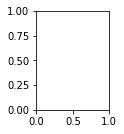

In [40]:
#plot the convergence using the sample steps
#plt.figure(0, figsize=(16,7))

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(7,5)])))
plt.subplot(241)
#plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(7,5)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-x-x-x-x-x-x-x-x'][(2,9)])))
plt.subplot(242)
plt.plot(xaxis,np.asarray(States_track['x-x-x-x-x-x-x-x-x'][(2,9)]))
plt.show

xaxis = np.asarray(range(0, len(States_track['x-2-x-x-1-x-x-x-x'][(6,5)])))
plt.subplot(243)
plt.plot(xaxis,np.asarray(States_track['x-2-x-x-1-x-x-x-x'][(6,5)]))
plt.show


xaxis = np.asarray(range(0, len(States_track['4-x-x-7-x-x-x-x-x'][(1,1)])))
plt.subplot(244)
plt.plot(xaxis,np.asarray(States_track['4-x-x-7-x-x-x-x-x'][(1,1)]))
plt.show



In [ ]:
### Epsilon - decay check

In [ ]:
time = np.arange(0,5000000)
epsilon = []
for i in range(0,5000000):
    epsilon.append(min_epsilon + (max_epsilon - min_epsilon) * np.exp(-0.000001*i))

In [ ]:
plt.plot(time, epsilon)
plt.show()